In [1]:
import math
import random
import numpy as np
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Dataset control unit

In [2]:
DATASETS_DIR = "datasets"

TRAIN_PATH = pl.Path(f"{DATASETS_DIR}/train.csv");
TEST_PATH = pl.Path(f"{DATASETS_DIR}/test_features.csv");
SUBMISSION_PATH = pl.Path(f"{DATASETS_DIR}/sample_submission.csv");

## Analysis control unit

In [3]:
USE_PAIRPLOTS = True
USE_BARPLOTS = True
USE_PCA = True

In [4]:
df = pd.read_csv(TRAIN_PATH)

### Analysing data from the available dataset

In [5]:
df

,Sex,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target
0,M,0.725,0.550,0.200,1.5100,0.8735,0.4265,0.5085,9
1,F,0.415,0.340,0.130,0.3675,0.1460,0.0885,0.1200,10
2,M,0.705,0.555,0.215,2.1410,1.0465,0.3830,0.5280,11
3,I,0.375,0.290,0.095,0.2875,0.1230,0.0605,0.0800,6
4,F,0.680,0.500,0.185,1.7410,0.7665,0.3255,0.4685,12
...,...,...,...,...,...,...,...,...,...
3131,F,0.575,0.480,0.165,1.0780,0.5110,0.2095,0.3060,9
3132,M,0.585,0.455,0.125,1.0270,0.3910,0.2120,0.2500,17
3133,I,0.395,0.270,0.100,0.2985,0.1445,0.0610,0.0820,5
3134,M,0.415,0.305,0.100,0.3250,0.1560,0.0505,0.0910,6


In [6]:
df.describe()

,Length,Diameter,Height,weight_1,weight_2,weight_3,weight_4,target
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,0.524141,0.407868,0.139115,0.829300,0.359130,0.180738,0.239251,9.948023
std,0.120807,0.099984,0.039111,0.492789,0.222860,0.110205,0.139756,3.290532
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.348750,0.115000,0.440500,0.184375,0.092875,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.801000,0.336000,0.171000,0.234500,9.000000
75%,0.615000,0.480000,0.165000,1.156500,0.503625,0.254000,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,0.897000,29.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       3136 non-null   object 
 1   Length    3136 non-null   float64
 2   Diameter  3136 non-null   float64
 3   Height    3136 non-null   float64
 4   weight_1  3136 non-null   float64
 5   weight_2  3136 non-null   float64
 6   weight_3  3136 non-null   float64
 7   weight_4  3136 non-null   float64
 8   target    3136 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.6+ KB


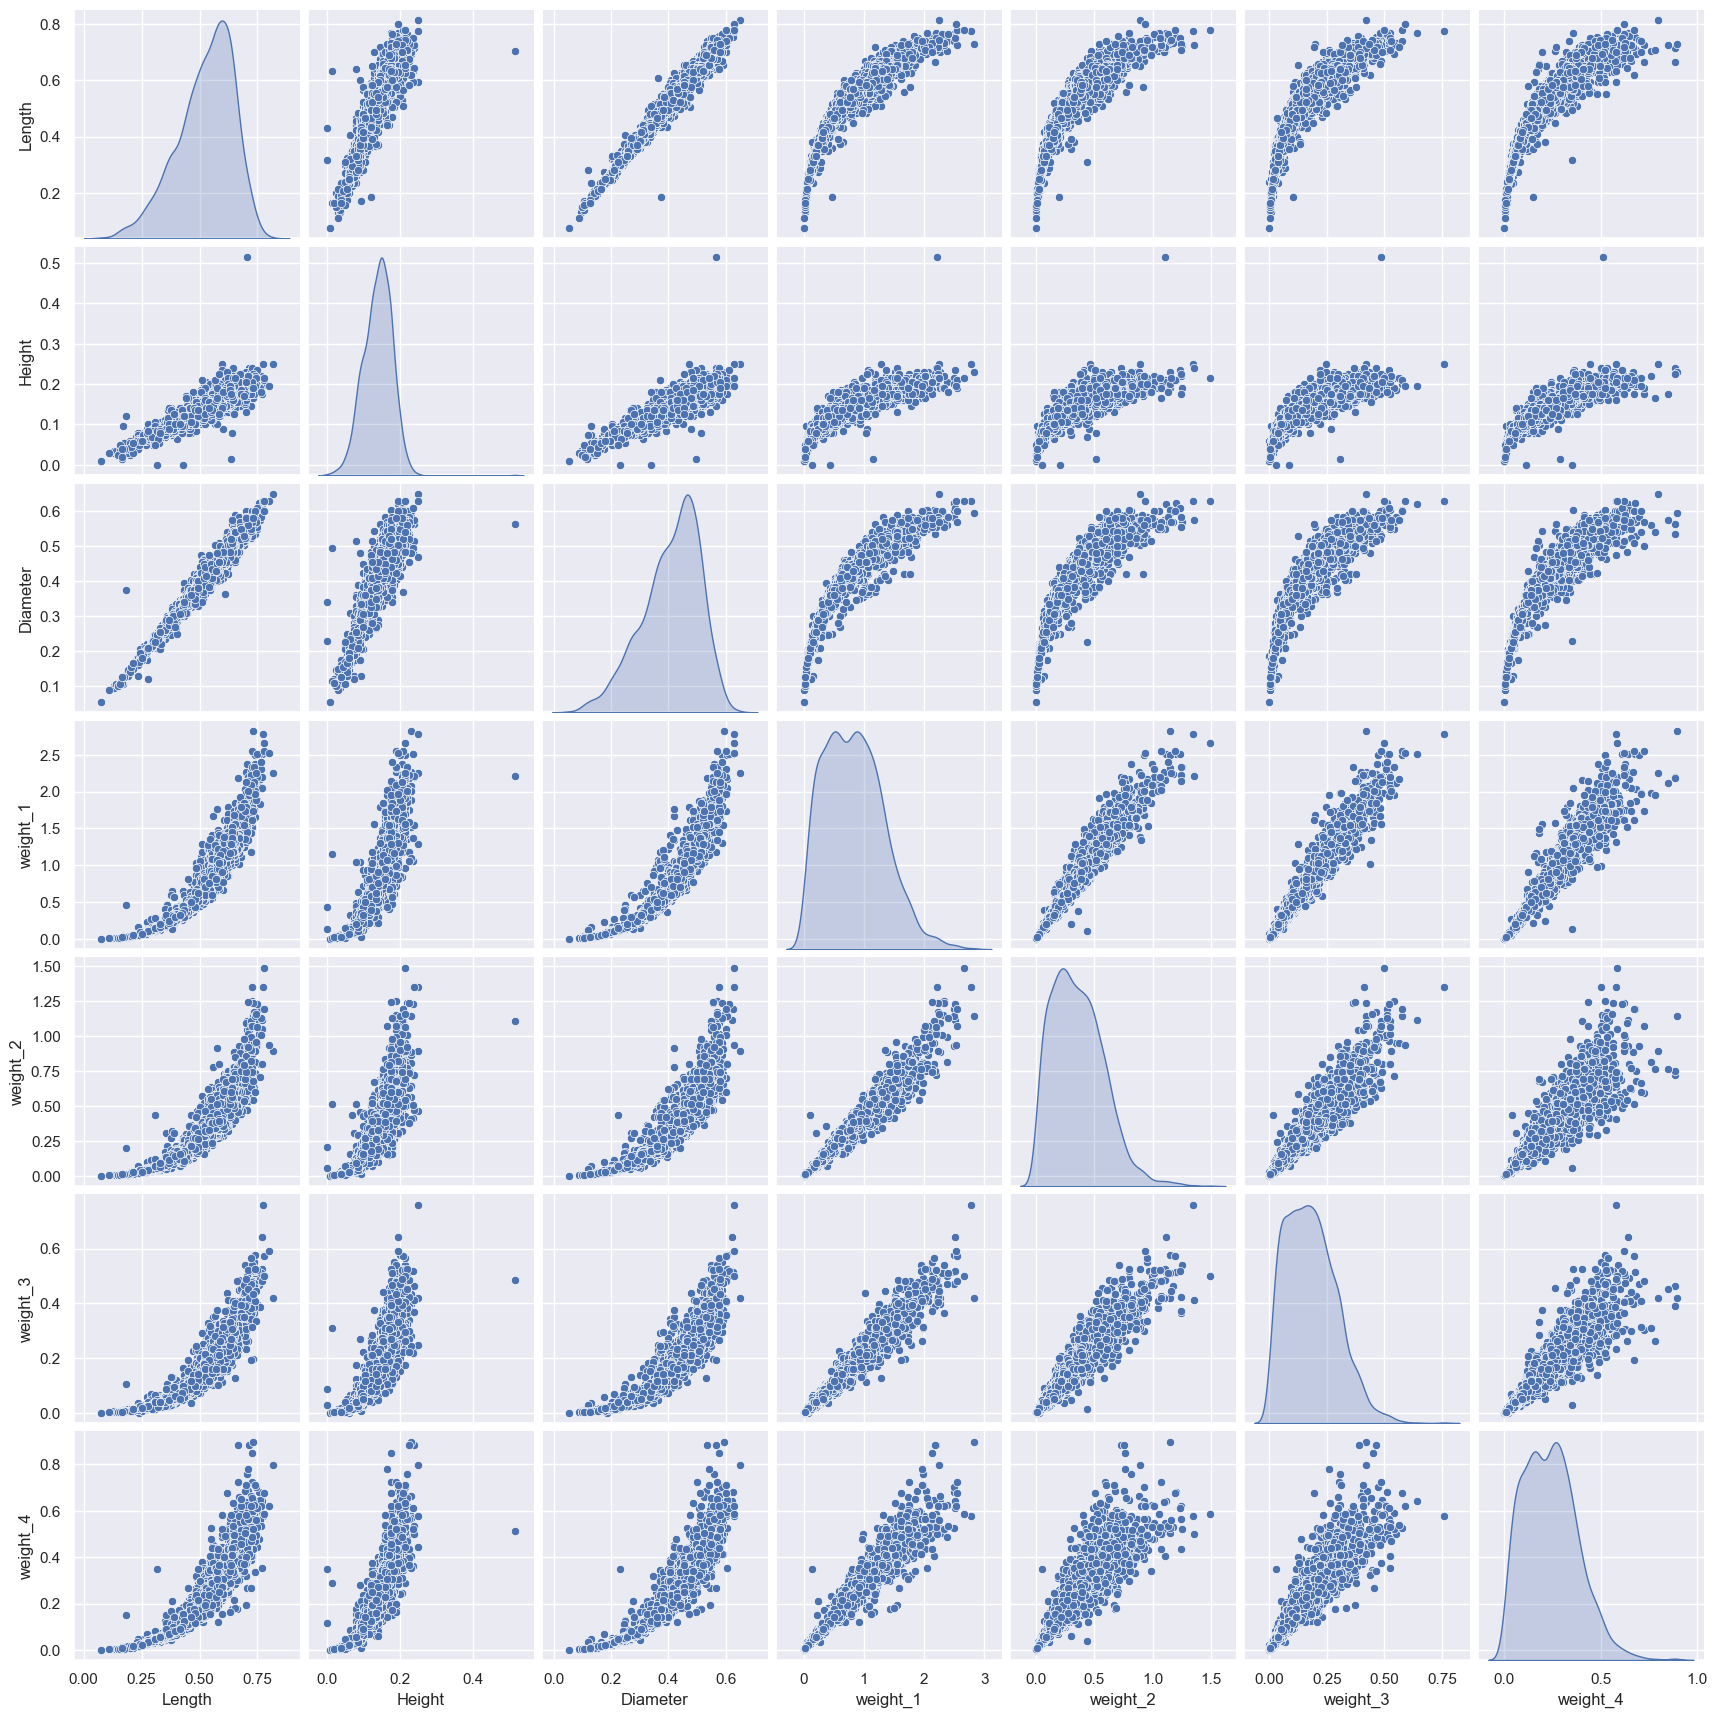

In [8]:
if USE_PAIRPLOTS:
    sns.set()
    sns.pairplot(df[['Length', 'Height', 'Diameter', 'weight_1', 'weight_2', 'weight_3', 'weight_4']], diag_kind="kde")

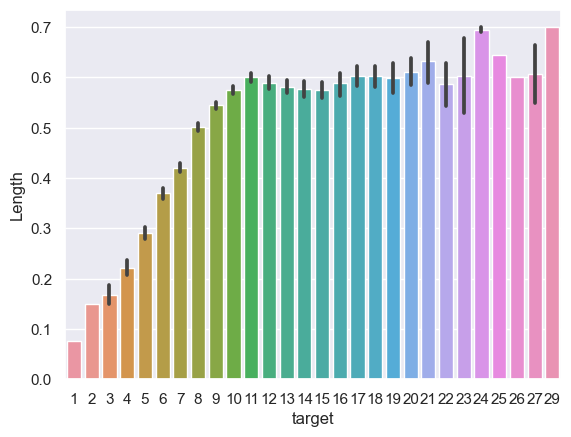

In [9]:
if USE_BARPLOTS:
    sns.barplot(x=df['target'], y=df['Length']);

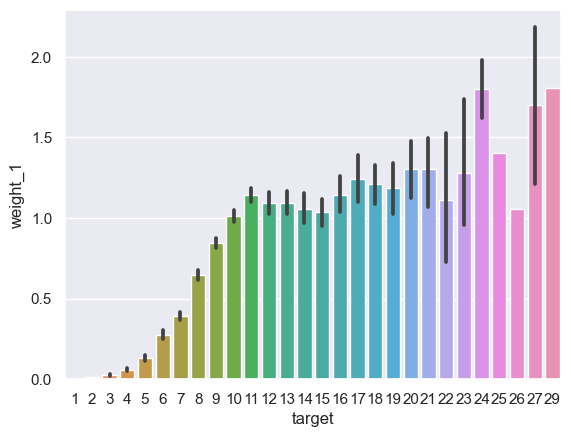

In [10]:
if USE_BARPLOTS:
    sns.barplot(x=df['target'], y=df['weight_1']);

## Data control unit

In [11]:
USE_FEATURE_DROP = False
USE_FEATURE_ENGINEERING = False
USE_FEATURE_SCALING = False
USE_OUTLIER_DETECTION = True
USE_FEATURE_POLYNOMIAL = False

### Data preprocessing

In [12]:
if USE_FEATURE_DROP:
    df.drop(["Sex"], inplace=True, axis=1)
else:
    df = pd.get_dummies(df, columns=["Sex"])

### Feature engineering

In [13]:
if USE_FEATURE_ENGINEERING:
    df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
    df.drop(['Length', 'Diameter', 'Height'], axis=1, inplace=True)
    df['Weight'] = df['weight_1'] * df['weight_2'] * df['weight_3'] * df['weight_4']
    df.drop(['weight_1', 'weight_2', 'weight_3', 'weight_4'], axis=1, inplace=True)

### Data normalisation and filtration

In [14]:
if USE_FEATURE_SCALING:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    if USE_FEATURE_ENGINEERING:
        scaling_columns = ["Volume", "Weight"]
    else:
        scaling_columns = ['Length', 'Diameter', 'Height', 'weight_1', 'weight_2', 'weight_3', 'weight_4']
    df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [15]:
if USE_OUTLIER_DETECTION:
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [16]:
if USE_FEATURE_POLYNOMIAL:
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias=False)
    if USE_FEATURE_ENGINEERING:
        polynomial_columns = ["Volume", "Weight"]
    else:
        polynomial_columns = ['Length', 'Diameter', 'Height', 'weight_1', 'weight_2', 'weight_3', 'weight_4']
    
    poly_np = poly.fit_transform(df[polynomial_columns])
    poly_df = pd.DataFrame(poly_np, columns=[str(i) for i, _ in enumerate(poly_np[0])])
    
    df.drop(polynomial_columns, axis=1, inplace=True)
    
    df = df.reset_index(drop=True)
    poly_df = poly_df.reset_index(drop=True)
    
    df = df.join(poly_df)

### Data visualisation after pipeline

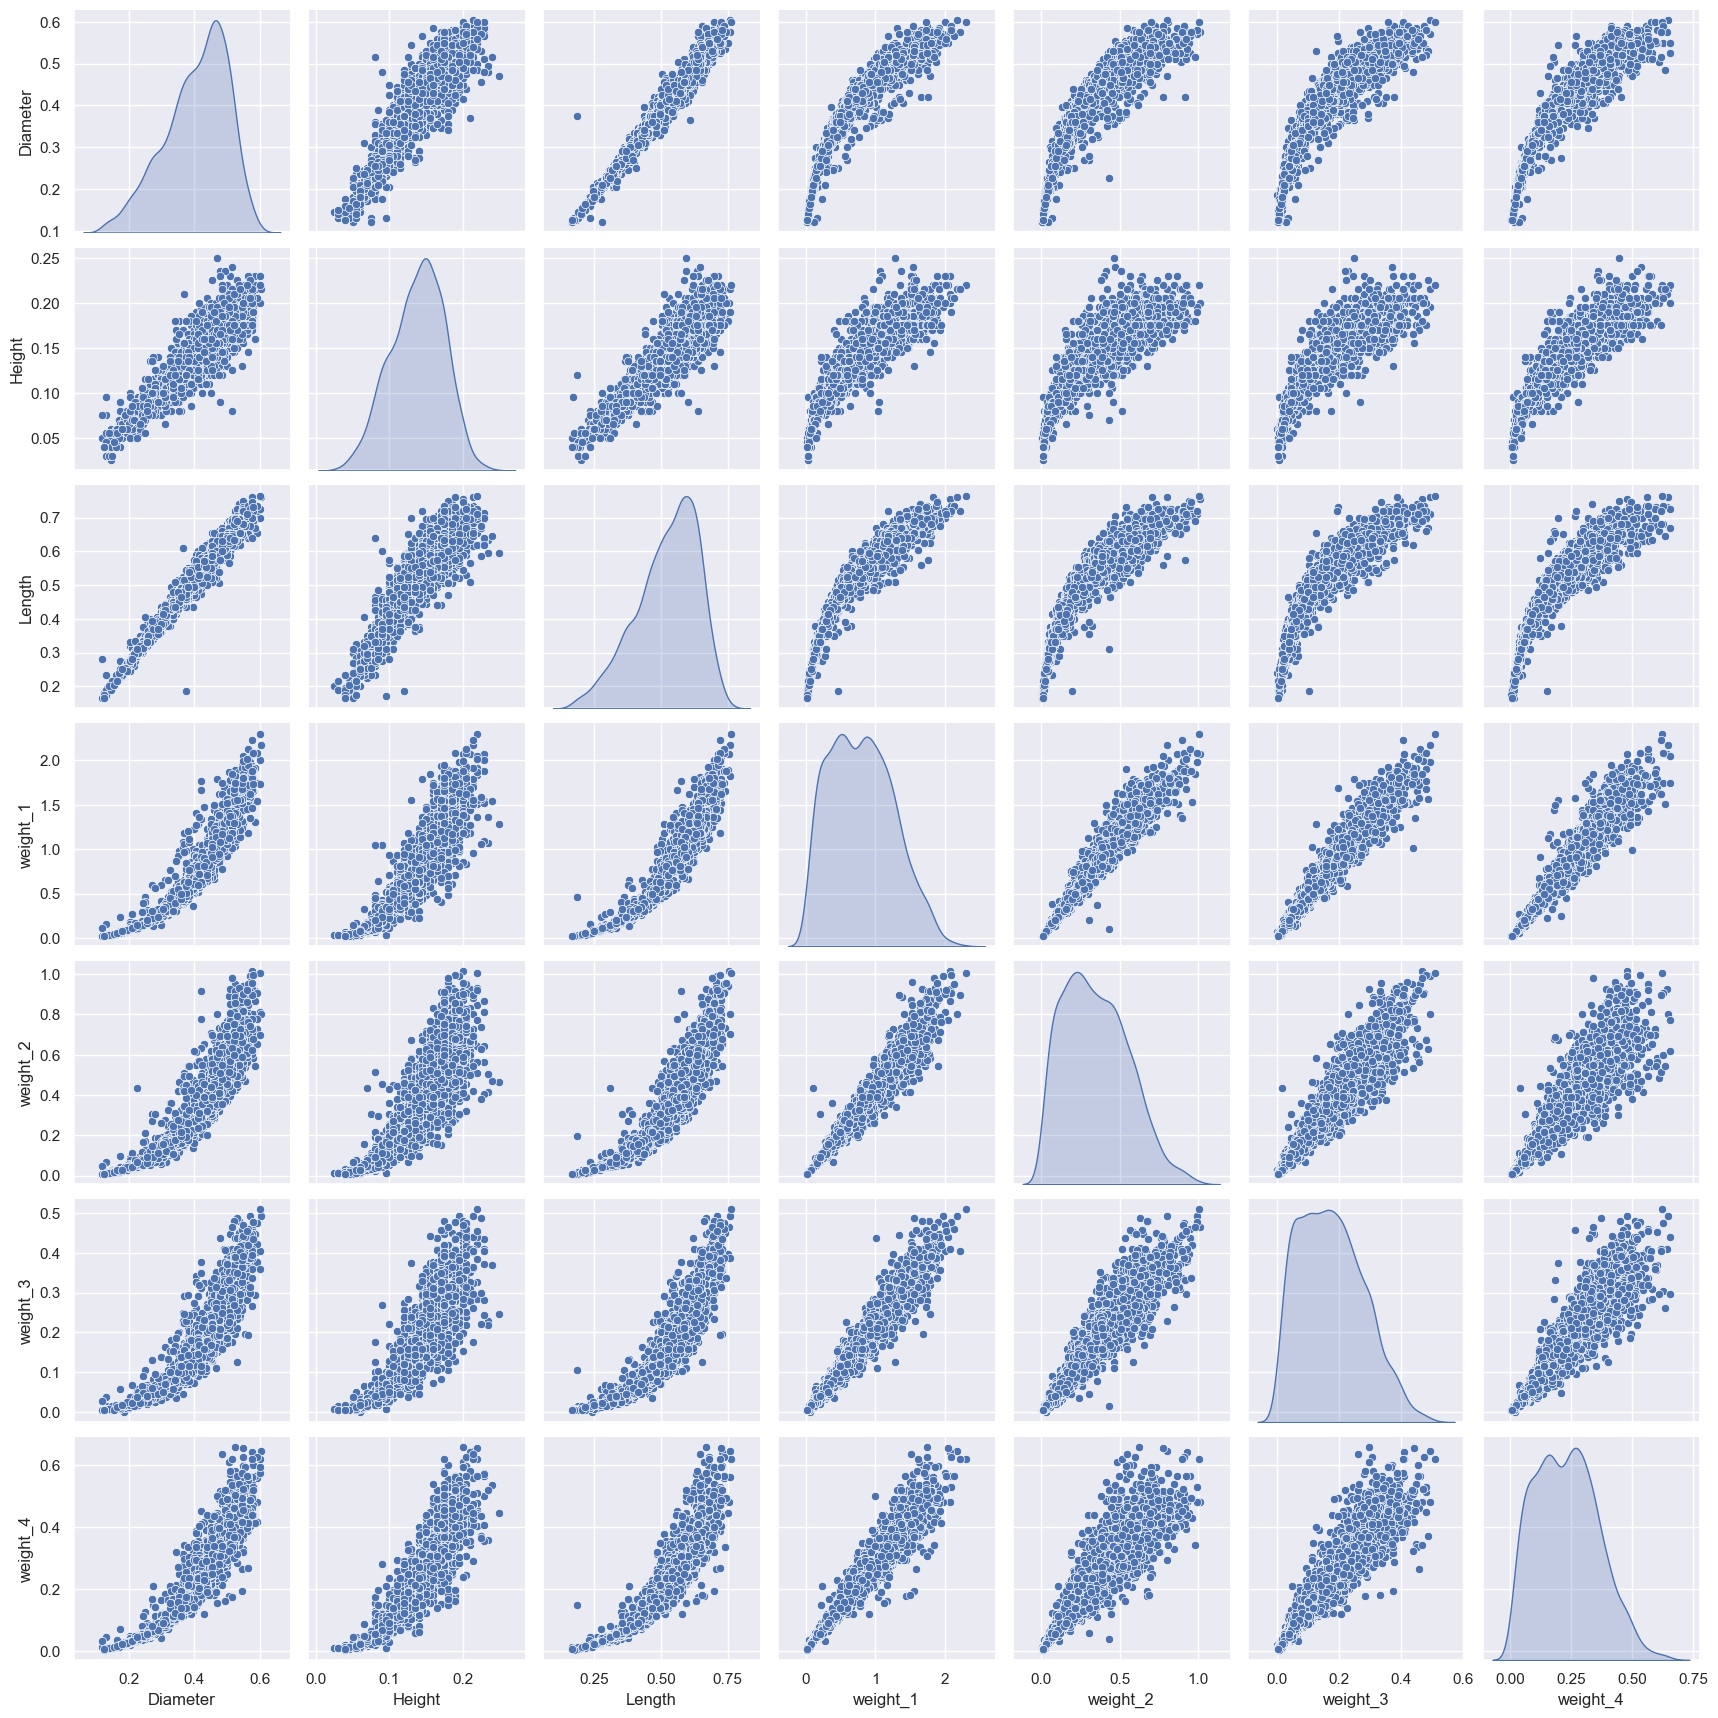

In [17]:
if USE_PAIRPLOTS:
    sns.set()
    if USE_FEATURE_DROP:
        sns.pairplot(df[df.columns.difference(['target'])], diag_kind="kde")
    else:
        sns.pairplot(df[df.columns.difference(['target', 'Sex_M', 'Sex_I', 'Sex_F'])], diag_kind="kde")

In [18]:
if USE_BARPLOTS:
    if USE_FEATURE_ENGINEERING:
        sns.barplot(x=df['target'], y=df['Volume']);

In [19]:
if USE_BARPLOTS:
    if USE_FEATURE_ENGINEERING:
        sns.barplot(x=df['target'], y=df['Weight']);

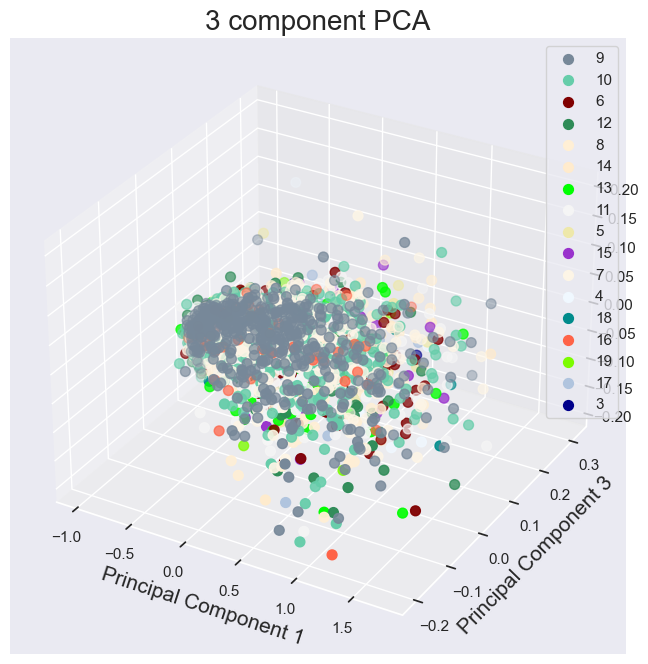

In [20]:
if USE_PCA:
    from sklearn.decomposition import PCA
    from matplotlib import colors
    pca = PCA(n_components=3)
    if USE_FEATURE_DROP:
        pca_components_df = pca.fit_transform(df[df.columns.difference(['target'])])
    else:
        pca_components_df = pca.fit_transform(df[df.columns.difference(['target', 'Sex_M', 'Sex_I', 'Sex_F'])])
    pca_df = pd.DataFrame(data=pca_components_df, columns=['c-1', 'c-2', 'c-3'])
    pca_df['target'] = df['target']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1, projection='3d') 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 component PCA', fontsize = 20)
    targets = df['target'].unique()
    colors = random.sample(list(colors.cnames.values()), len(targets))
    for target, color in zip(targets, colors):
        target_index = pca_df.loc[pca_df['target'] == target].index
        ax.scatter(pca_df.iloc[target_index]['c-1'],
                   pca_df.iloc[target_index]['c-2'],
                   pca_df.iloc[target_index]['c-3'],
                   c = color,
                   s = 50)
    ax.legend(targets)
    ax.grid()

### Building model

In [21]:
USE_MODEL_SELECTION = True
USE_MODEL_LINEAR_REGRESSION = False
USE_MODEL_KNN = False
USE_ENSEMBLE = False
USE_RMSE_METRIC = True

verbose = False

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [23]:
if USE_MODEL_SELECgTION:
    from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
    from sklearn.neighbors import KNeighborsRegressor

    models = [
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
        RandomForestRegressor(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(n_neighbors=40),
        SVR(kernel='linear'), 
        LinearRegression(),
        Ridge(),
        Lasso()
    ]

    experiments = 15
    avg_accuracies = []
    avg_rmses      = []

    for model in models:
        print("-"*40)
        print(f"Analysing {type(model).__name__}")

        avg_rmse = 0
        avg_accuracy = 0

        for experiment in range(experiments):        
            train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
            y_train, X_train = train_df['target'], train_df.drop('target', axis=1)
            y_test, X_test = test_df['target'], test_df.drop('target', axis=1)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred = [round(y_sample) for y_sample in y_pred]

            rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
            avg_rmse += rmse
            if verbose:
                print(f"{experiment + 1}: RMSE={rmse}")

            accuracy = model.score(X_test, y_test)
            avg_accuracy += accuracy
            if verbose:
                print(f"{experiment + 1}: Accuracy={accuracy * 100}%")

        avg_rmse /= experiments
        avg_rmses.append(avg_rmse)
        print(f"Average RMSE: {avg_rmse}")

        avg_accuracy /= experiments
        avg_accuracies.append(avg_accuracy)
        print(f"Average accuracy: {avg_accuracy * 100}%")

    best_model = None 
    best_rmse, best_accuracy = +math.inf, -math.inf

    for model, avg_rmse, avg_accuracy in zip(models, avg_rmses, avg_accuracies):
        if USE_RMSE_METRIC:
            if best_rmse > avg_rmse:
                best_rmse = avg_rmse
                best_accuracy = avg_accuracy
                best_model = model
        else:
            if best_accuracy < avg_accuracy:
                best_rmse = avg_rmse
                best_accuracy = avg_accuracy
                best_model = model

    print("-"*40)
    print(f"Minimum RMSE: {best_rmse}")
    print(f"Maximum accuracy: {best_accuracy * 100}%")

----------------------------------------
Analysing AdaBoostRegressor
Average RMSE: 2.3391834967462244
Average accuracy: 24.739720547481074%
----------------------------------------
Analysing GradientBoostingRegressor
Average RMSE: 1.8713301037182009
Average accuracy: 51.84891302999313%
----------------------------------------
Analysing RandomForestRegressor
Average RMSE: 1.9103101269571934
Average accuracy: 49.8852958841368%
----------------------------------------
Analysing DecisionTreeRegressor
Average RMSE: 2.6226110825191546
Average accuracy: 3.4733319590885205%
----------------------------------------
Analysing KNeighborsRegressor
Average RMSE: 1.954786958463795
Average accuracy: 48.13132264781077%
----------------------------------------
Analysing SVR
Average RMSE: 1.9971005473001322
Average accuracy: 45.00286028092048%
----------------------------------------
Analysing LinearRegression
Average RMSE: 1.968712222385368
Average accuracy: 47.85118889166549%
-------------------------

In [24]:
if USE_ENSEMBLE:
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.model_selection import GridSearchCV
    
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    y_train, X_train = train_df['target'], train_df.drop('target', axis=1)
    y_test, X_test = test_df['target'], test_df.drop('target', axis=1)
    
    USE_GRADIENT_BOOSTING = True
    USE_SEARCH_PARAMS = False
    
    estimator = GradientBoostingRegressor if USE_GRADIENT_BOOSTING else RandomForestRegressor
    
    if USE_SEARCH_PARAMS:
        if USE_GRADIENT_BOOSTING:
            param_grid = {
                'learning_rate': [0.01, 0.02, 0.03, 0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100, 500, 1000, 1500],
                'max_depth'    : [4, 6, 8, 10]
            }
        else:
            param_grid = {
                'n_estimators': [200, 300, 400, 500],
                'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                'max_features': ['sqrt','log2'],
                'max_depth': [70, 80, 90, 100],
                'n_estimators': [900, 1000, 1100],
                'random_state' : [0]
            }
        best_model = GridSearchCV(estimator=estimator(), 
                                  param_grid=param_grid, 
                                  cv=3, 
                                  n_jobs=-1, 
                                  verbose=2)
        best_model.fit(X_train, y_train)
        if verbose:
            print(best_model.best_params_)
    else:
        if USE_GRADIENT_BOOSTING:
            best_estimator_params = {
                'learning_rate': 0.01, 
                'max_depth': 4,
                'subsample': 0.2,
                'n_estimators': 500,
                'random_state': 0
            }
        else:
            best_estimator_params = {
                'n_estimators': 900, 
                'max_depth': 70,
                'max_features': 'sqrt',
                'random_state': 0
            }
        best_model = estimator(**best_estimator_params)
        best_model.fit(X_train, y_train)
        if verbose:
            feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
            print(feature_scores)
    
    y_pred = best_model.predict(X_test)

    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    if verbose:
        print(f"RMSE={rmse}")

    y_pred = [round(y_sample) for y_sample in y_pred]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if verbose:
        print(f"Accuracy={accuracy * 100}%")

In [25]:
if USE_MODEL_KNN:
    from sklearn.neighbors import KNeighborsRegressor
    
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    y_train, X_train = train_df['target'], train_df.drop('target', axis=1)
    y_test, X_test = test_df['target'], test_df.drop('target', axis=1)

    best_k, best_model = 0, None
    best_rmse, best_accuracy = +math.inf, -math.inf

    for k in range(200):
        model = KNeighborsRegressor(n_neighbors=k + 1)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred = [round(y_sample) for y_sample in y_pred]

        rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if verbose:
            print(f"k={k}: RMSE={rmse}")

        accuracy = model.score(X_test, y_test)
        if verbose:
            print(f"k={k}: Accuracy={accuracy * 100}%")

        if USE_RMSE_METRIC:
            if best_rmse > rmse:
                best_rmse = rmse
                best_accuracy = accuracy
                best_k = k
                best_model = model
        else:
            if best_accuracy < accuracy:
                best_rmse = rmse
                best_accuracy = accuracy
                best_k = k
                best_model = model
        
    print(f"Best k for KNeighborsClassifier: {best_k}")
    print(f"Best RMSE: {best_rmse}")
    print(f"Best accuracy: {best_accuracy}")

In [26]:
if USE_MODEL_LINEAR_REGRESSION:
    from sklearn.linear_model import LinearRegression
    
    experiments = 100
    
    best_model = None
    best_rmse, best_accuracy = +math.inf, -math.inf

    for experiment in range(experiments):
        train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
        y_train, X_train = train_df['target'], train_df.drop('target', axis=1)
        y_test, X_test = test_df['target'], test_df.drop('target', axis=1)
        
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred = [round(y_sample) for y_sample in y_pred]

        rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if verbose:
            print(f"{experiment + 1}: RMSE={rmse}")

        accuracy = model.score(X_test, y_test)
        if verbose:
            print(f"{experiment + 1}: Accuracy={accuracy * 100}%")

        if USE_RMSE_METRIC:
            if best_rmse > rmse:
                best_rmse = rmse
                best_accuracy = accuracy
                best_k = k
                best_model = model
        else:
            if best_accuracy < accuracy:
                best_rmse = rmse
                best_accuracy = accuracy
                best_k = k
                best_model = model
        
    print(f"Best RMSE: {best_rmse}")
    print(f"Best accuracy: {best_accuracy}")

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = df["target"].unique() # name of classes

Text(0.5, 427.9555555555555, 'Predicted label')

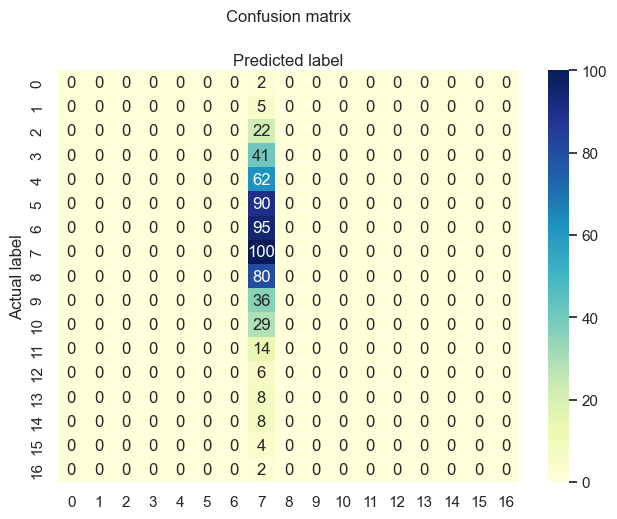

In [28]:
# configure heatmap
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00        90
           9       0.00      0.00      0.00        95
          10       0.17      1.00      0.28       100
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         2

    accuracy              

/Users/danorel/Workspace/Education/University/KMA/Labs/ML/kaggle-humanity/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danorel/Workspace/Education/University/KMA/Labs/ML/kaggle-humanity/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danorel/Workspace/Education/University/KMA/Labs/ML/kaggle-humanity/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

### Trying model with test data

In [30]:
df = pd.read_csv(TEST_PATH)

In [31]:
if USE_FEATURE_DROP:
    df.drop(["Sex"], inplace=True, axis=1)
else:
    df = pd.get_dummies(df, columns=["Sex"])

In [32]:
if USE_FEATURE_ENGINEERING:
    df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
    df.drop(['Length', 'Diameter', 'Height'], axis=1, inplace=True)
    df['Weight'] = df['weight_1'] * df['weight_2'] * df['weight_3'] * df['weight_4']
    df.drop(['weight_1', 'weight_2', 'weight_3', 'weight_4'], axis=1, inplace=True)

In [33]:
if USE_FEATURE_SCALING:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    if USE_FEATURE_ENGINEERING:
        scaling_columns = ["Volume", "Weight"]
    else:
        scaling_columns = ['Length', 'Diameter', 'Height', 'weight_1', 'weight_2', 'weight_3', 'weight_4']
    df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [34]:
if USE_FEATURE_POLYNOMIAL:
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias=False)
    if USE_FEATURE_ENGINEERING:
        polynomial_columns = ["Volume", "Weight"]
    else:
        polynomial_columns = ['Length', 'Diameter', 'Height', 'weight_1', 'weight_2', 'weight_3', 'weight_4']
    
    poly_np = poly.fit_transform(df[polynomial_columns])
    poly_df = pd.DataFrame(poly_np, columns=[str(i) for i, _ in enumerate(poly_np[0])])
    
    df.drop(polynomial_columns, axis=1, inplace=True)
    
    df = df.reset_index(drop=True)
    poly_df = poly_df.reset_index(drop=True)
    
    df = df.join(poly_df)

In [35]:
X_output = df
y_output = best_model.predict(X_output)

### Publishing test output to sample submission file

In [36]:
df = pd.read_csv(SUBMISSION_PATH)
df['target'] = y_output

In [37]:
df.to_csv(SUBMISSION_PATH)